In [93]:
import numpy as np
import pandas as pd

# K-Means Algorithm

K-Means algorithm is a clustring algorithm. It is also a classic Expectation-Maximization algorithm.<br> 
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance) <br>
The Step is as follows:
1. Randomly select k "cluster centers" from the data set;<br>
2. For each iteration (iterate through all points):<br>
(1). Find the nearest center for each point, and store the cluster for each center; <br>
(2). Calculate the new center for each cluster; <br>
(3). If there are no change of the means, end the loop; otherwise iterate. <br>

In [121]:
class KMeans():
    def __init__(self, k = 3, num_iter = 1000):
        """
            Some initializations, if neccesary
            
            Parameter:
                k: Number of clusters we are trying to classify
                num_iter: Number of iterations we are going to loop
        """
        
        self.model_name = 'KMeans'
        self.k = k
        self.num_iter = num_iter
        self.centers = None
        self.RM = None
        
    def train(self, X):
        """
            Train the given dataset
            
            Parameter:
                X: Matrix or 2-D array. Input feature matrix.
                
            Return:
                self: the whole model containing relevant information
        """
        
        r, c = X.shape
        centers = []
        RM = np.zeros((r, self.k))
        
        """
            TODO: 1. Modify the following code to randomly choose the initial centers
        """
        initials = np.random.choice(r, self.k, replace=False)
        for i in initials:
            centers.append(X[i, :])
        centers = np.array(centers)
        
        for i in range(self.num_iter):
            for j in range(r):
                """
                    TODO: 2. Modify the following code to update the Relation Matrix
                """
                distance = np.array([np.sqrt(((X[j, :] - center) ** 2).sum()) for center in centers])
                minpos = np.argmin(distance)
                
                temp_rm = np.zeros(self.k)
                temp_rm[minpos] = 1
                RM[j,:] = temp_rm
            new_centers = centers.copy()
            for l in range(self.k):
                """
                    TODO: 3. Modify the following code to update the centers
                """
                row_index = (RM[:, l] == 1).flatten()
                all_l = X[row_index, :]
                new_centers[l, :] = [all_l.mean()]
            if np.sum(new_centers - centers) < 0.000000000000000000001:
                self.centers = new_centers
                self.RM = RM
                return self
            centers = new_centers
        self.centers = centers
        self.RM = RM
        return self

In [95]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [96]:
X = X[:,2:4]

In [97]:
clf = KMeans(k = 3)
model = clf.train(X)

(86, 2)
(55, 2)
(9, 2)


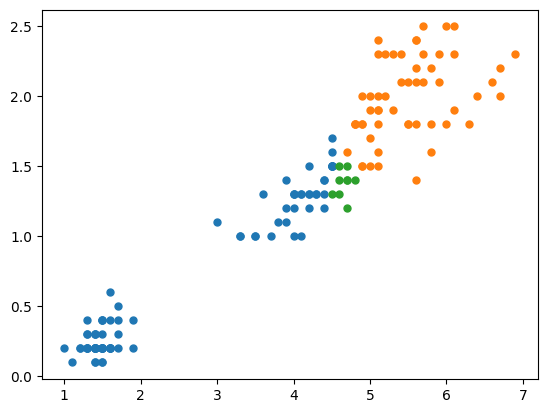

In [98]:
r, c = model.RM.shape
groups = []
for i in range(c):
    index = model.RM[:,i] == 1    
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

In [99]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,[0,2]]

(35, 2)
(17, 2)
(98, 2)


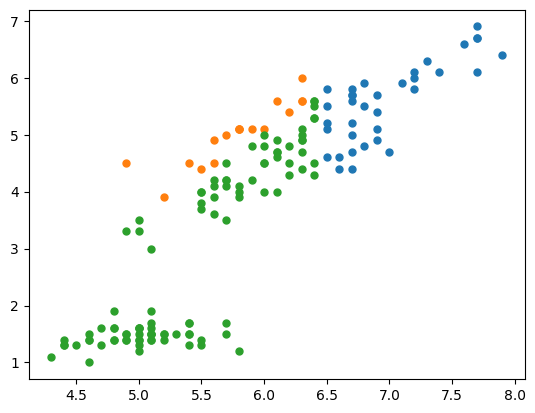

In [100]:
clf = KMeans(k = 3)
model = clf.train(X)
r, c = model.RM.shape
groups = []
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

## 3 dimension

In [101]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,1:4]

In [102]:
clf = KMeans(k = 3)
model = clf.train(X)

In [103]:
from mpl_toolkits.mplot3d import Axes3D

In [104]:
groups = []
r, c = model.RM.shape
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])

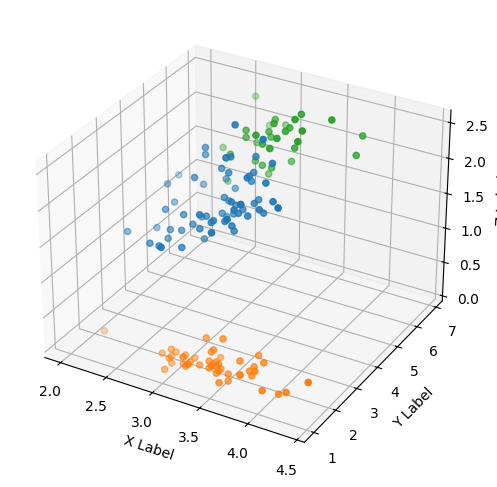

In [105]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')  # Ensures that a 3D axis is created

# Label the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set the visibility of the axes
ax._axis3don = True

# Plot the points
for group in groups:
    ax.scatter(group[:,0], group[:,1], group[:,2], marker='o')

plt.show()

Note: We should expect different results every time we run Kmeans as the centers are randomly initialized.

# Gaussian Mixture

Gaussian Mixture Algorithm is a softer version of the k-means algorithm. It is also a classic example of the Expectation-Maximization Algorithm. <br>
In Gaussian Mixture Algorithm, we model the data as coming from a mixture of Gaussians.<br>
In this example, we will be using a randomly generated Gaussian Distribution. <br>

In [106]:
def gaussian(X, mu, cov):
    """ 
        Fucntion to create mixtures using the Given matrix X, given covariance and given mu

        Return:
        transformed x.
    """
    # X should be matirx-like
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [107]:
from sklearn.datasets import make_blobs

In [108]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=2)

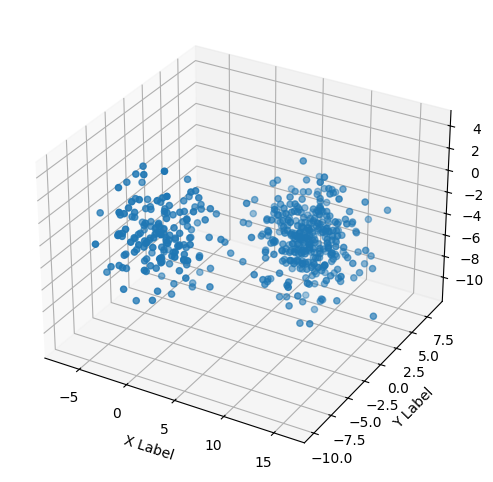

In [109]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')  # Ensures that a 3D axis is created

# Label the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set the visibility of the axes
ax._axis3don = True

# Plot the points
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')

plt.show()

In [110]:
def initialize_clusters(X, n_clusters):
    """ 
        Initialize the clusters by storing the information in the data matrix X into the clusters

        Parameter:
            X: Input feature matrix
            n_clusters: Number of clusters we are trying to classify

        Return:
            cluster: List of clusters. Each cluster center is calculated by the KMeans algorithm above.
    """
    clusters = []
    index = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    
    kmeans = KMeans().train(X)
    mu_k = kmeans.centers
    
    for i in range(n_clusters):
        clusters.append({
            'w_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [111]:
def expectation_step(X, clusters):
    """ 
        "E-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    totals = np.zeros((X.shape[0], 1), dtype=np.float64)
    
    for cluster in clusters:
        w_k = cluster['w_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        """
            TODO: 4. Calculate the numerator part of the cluster posterior
            TODO: 5. Calculate the denominator part of the cluster posterior
        """
        
        cluster['gaussian'] = w_k * gaussian(X, mu_k, cov_k)
        totals += cluster['gaussian']               
    
    for cluster in clusters:
        """
            TODO: 6. Calculate the cluster posterior using totals
        """
        cluster['posterior'] = cluster['gaussian'] / totals

In [141]:
def maximization_step(X, clusters):
    """ 
        "M-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    N = float(X.shape[0])
  
    for cluster in clusters:
        posterior = cluster['posterior']
        cov_k = np.zeros((X.shape[1], X.shape[1]))
        
        """
            TODO: 7. Calculate the new cluster data
        """        
        N_k = np.sum(posterior, axis=0)
        w_k = N_k / N
        # mu_k = X.T @ posterior / N_k
        mu_k = np.dot(X.T, posterior) / N_k  # Correct the dot product
        mu_k = mu_k.reshape(-1)
        
        diff = X - mu_k
        cov_k = np.dot(diff.T, posterior * diff) / N_k
        
        cluster['w_k'] = w_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [127]:
def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['posterior'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

In [128]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))

    for i in range(n_epochs):
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['w_k']).reshape(-1)
        
    return clusters, likelihoods, scores, sample_likelihoods

In [142]:
clusters, likelihoods, scores, sample_likelihoods = train_gmm(X, 3, 100)

In [143]:
from sklearn.cluster import KMeans

In [144]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[10.08039706  1.96388392 -5.29347176]
 [-0.80569934 -5.27119568 -2.35856065]
 [ 7.55203174  3.21006754 -4.31191565]]
Means by our implementation:
 [[ 8.68081267  2.53707318 -4.46161608]
 [ 8.31381031  3.24965149 -5.84297096]
 [-0.82437393 -5.29010818 -2.35030583]]
Scores by sklearn:
 [ -7.22828257  -6.58735582  -6.25527042  -8.5441606   -7.884878
  -6.45954152  -6.82929287  -7.54100469  -5.54665436  -7.2305762
  -5.81412106  -6.92918537 -10.220342    -7.80078124  -7.29912002
  -5.65103276  -7.35457749  -6.19307064  -6.02146844 -10.09703462]
Scores by our implementation:
 [-2.23246464e-02 -1.44035166e+01 -1.65935199e-01 -1.75904455e+01
 -2.28095531e+01 -4.24644653e-01 -1.54936164e+01 -1.62867432e+01
 -3.31195362e-01 -8.90888632e-01 -2.71410775e-01 -1.96066491e+01
 -8.59944919e-02 -6.21696314e+00 -2.34303325e+01 -2.32537878e-01
 -2.08939253e+01 -1.05411150e-01 -6.06467392e-01 -7.40149341e+00]


E:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
